In [1]:
%%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [2]:
!pip install super_gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 77.0 MB/s eta 0:00:00
  Using cached boto3-1.29.0-py3-none-any.whl (135 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
  Using cached coverage-5.3.1-cp310-cp310-linux_x86_64.whl
  Using cached Sphinx-4.0.3-py3-none-any.whl (2.9 MB)
  Using cached sphinx_rtd_theme-1.3.0-py2.py3-none-any.whl (2.8 MB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl (408 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cached onnxruntime-1.13.1-cp310-cp310-manylinux_2_27_x86_64.whl (4.5 MB)
  Using cached onnx-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Using cached pyparsing-2.4.5-py2.py3-none-any.whl (67 kB)
  Using cached einops-0.3.2-py3-none-any.whl (25 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached treelib

In [3]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

[2023-11-15 09:04:18] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-11-15 09:04:18] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-15 09:04:18] INFO - utils.py - NumExpr defaulting to 2 threads.
[2023-11-15 09:04:26] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-15 09:04:26] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-15 09:04:26] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-15 09:04:26] WARNING - env_sanity_check.py - Failed to verify installed packages: boto3 required but not found
[2023-11-15 09:04:26] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2023-11-15 09:04:26] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2023-11-15 09:04:26] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-theme required but not found
[2023-11-15 09:04:26] WARNING - env_sanity_check.py - Failed to verify i

In [4]:
from IPython.display import clear_output

In [5]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [6]:
from super_gradients.training import models

In [7]:
CHECKPOINT_DIR = 'checkpoints2'
trainer = Trainer(experiment_name='sign_yolonas_run2', ckpt_root_dir=CHECKPOINT_DIR)

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PZGUlzkMDsgtjgyuMZLt")
project = rf.workspace("cdhu-uppsala-university").project("a-b-...-z")
dataset = project.version(1).download("yolov5")

  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.5
    Uninstalling pyparsing-2.4.5:
      Successfully uninstalled pyparsing-2.4.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
super-gradients 3.4.1 requires pyparsing==2.4.5, but you have pyparsing 2.4.7 which is incompatible.


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to a-b-...-z-1 in yolov5pytorch::   0%|          | 0/1460 [00:00<?, ?it/s]

In [9]:
dataset_params = {
    'data_dir':'/content/a-b-...-z-1',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['A', 'B', 'C', 'D', 'E', 'F', 'G','H', 'I', 'J', 'K', 'L','M','N','O', 'P', 'Q', 'R', 'S', 'T', 'U',  'V', 'W', 'X', 'Y', 'Z']
}

In [11]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

Indexing dataset annotations: 100%|██████████| 72/72 [00:00<00:00, 4046.55it/s]


In [12]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

In [13]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [14]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


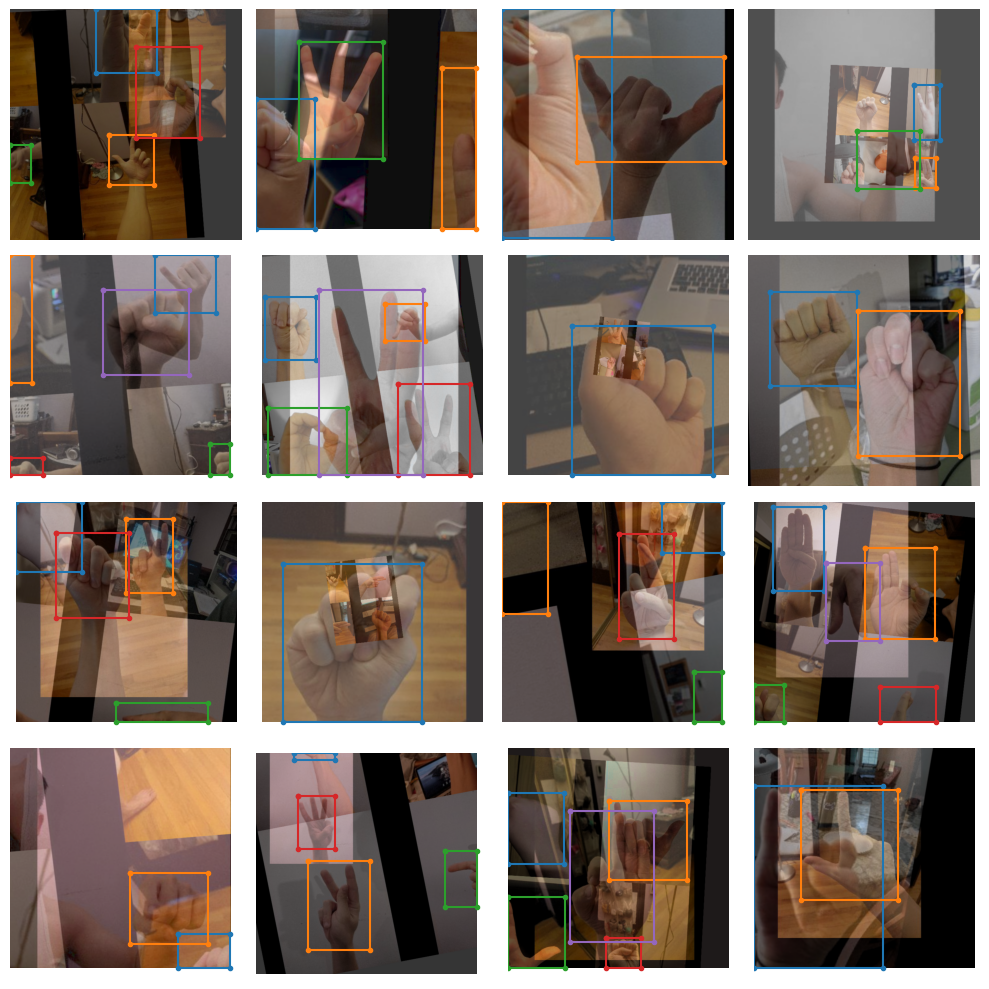

In [15]:
train_data.dataset.plot()

In [16]:
model = models.get('yolo_nas_s',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2023-11-15 09:05:59] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth
100%|██████████| 73.1M/73.1M [00:00<00:00, 235MB/s]
[2023-11-15 09:05:59] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [37]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 20,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [38]:
import torch
# Clear the CUDA memory cache
torch.cuda.empty_cache()

In [39]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)


[2023-11-15 09:34:05] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231115_093405_290564`
[2023-11-15 09:34:05] INFO - sg_trainer.py - Checkpoints directory: checkpoints2/sign_yolonas_run2/RUN_20231115_093405_290564
[2023-11-15 09:34:05] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.


The console stream is now moved to checkpoints2/sign_yolonas_run2/RUN_20231115_093405_290564/console_Nov15_09_34_05.txt


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
[2023-11-15 09:34:05] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20231115_093405_290564`
[2023-11-15 09:34:05] INFO - sg_trainer.py - Checkpoints directory: checkpoints2/sign_yolonas_run2/RUN_20231115_093405_290564
[2023-11-15 09:34:05] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
[2023-11-15 09:34:08] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:  

In [40]:
best_model = models.get('yolo_nas_s',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/content/checkpoints2/sign_yolonas_run2/RUN_20231115_093405_290564/ckpt_best.pth")

[2023-11-15 09:53:51] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints2/sign_yolonas_run2/RUN_20231115_093405_290564/ckpt_best.pth EMA checkpoint.


In [41]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))


Testing: 100%|██████████| 5/5 [00:02<00:00,  2.59it/s]

{'PPYoloELoss/loss_cls': 0.76050496,
 'PPYoloELoss/loss_iou': 0.16203761,
 'PPYoloELoss/loss_dfl': 0.3574868,
 'PPYoloELoss/loss': 1.2800294,
 'Precision@0.50': 0.12005557119846344,
 'Recall@0.50': 0.989130437374115,
 'mAP@0.50': 0.9382337331771851,
 'F1@0.50': 0.2094482183456421}

Testing: 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
[2023-11-15 09:54:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


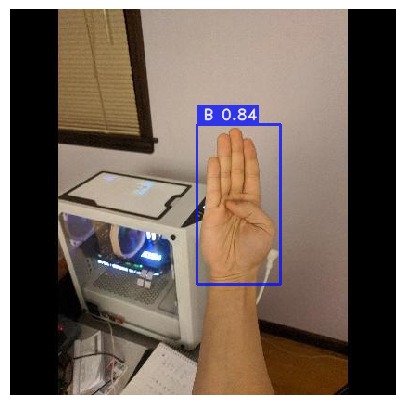

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


In [42]:
img_url = '/content/a-b-...-z-1/valid/images/B11_jpg.rf.f1955c44664120e0acc6f3143f0add61.jpg'
best_model.predict(img_url).show()

In [43]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [44]:
!gdown "https://drive.google.com/uc?id=1bLlfh9gr6JxE9Wacw4xgv5FNijA7j9GZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1bLlfh9gr6JxE9Wacw4xgv5FNijA7j9GZ&confirm=t
To: /content/demonew1.mp4
100% 1.26M/1.26M [00:00<00:00, 165MB/s]


In [45]:
input_video_path = f"/content/demonew1.mp4"
output_video_path = "detections.mp4"

In [46]:
import torch
device = 'cuda' if torch.cuda.is_available() else "GPU"

In [47]:
model.to(device).predict(input_video_path).save(output_video_path)

Predicting Video: 100%|██████████| 563/563 [00:12<00:00, 44.39it/s]


In [48]:
!rm '/content/result_compressed.mp4'

In [49]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/detections.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""
<video controls autoplay>
    <source src="{data_url}" type="video/mp4">
</video>
""")
